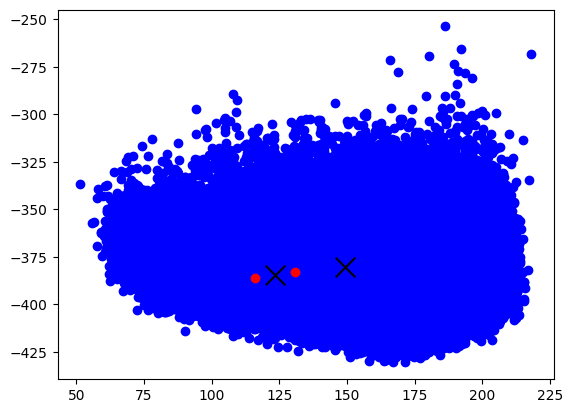

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from csv file, replace all 'NA' values with 0 and convert data to numeric format
data = pd.read_csv('weatherAUS.csv').replace({'No': 0, 'Yes': 1})

mean_value_1 = data['MinTemp'].astype(float).mean()
data['MinTemp'].fillna(mean_value_1, inplace=True)

mean_value_2 = data['MaxTemp'].astype(float).mean()
data['MaxTemp'].fillna(mean_value_2, inplace=True)

mean_value_6 = data['Rainfall'].astype(float).mean()
data['Rainfall'].fillna(mean_value_6, inplace=True)

mean_value_7 = data['Evaporation'].astype(float).mean()
data['Evaporation'].fillna(mean_value_7, inplace=True)

mean_value_8 = data['Sunshine'].astype(float).mean()
data['Sunshine'].fillna(mean_value_8, inplace=True)

mean_value_9 = data['WindGustSpeed'].astype(float).mean()
data['WindGustSpeed'].fillna(mean_value_9, inplace=True)

mean_value_10 = data['WindSpeed9am'].astype(float).mean()
data['WindSpeed9am'].fillna(mean_value_10, inplace=True)

mean_value_11 = data['WindSpeed3pm'].astype(float).mean()
data['WindSpeed3pm'].fillna(mean_value_11, inplace=True)

mean_value_12 = data['Humidity9am'].astype(float).mean()
data['Humidity9am'].fillna(mean_value_12, inplace=True)

mean_value_13 = data['Humidity3pm'].astype(float).mean()
data['Humidity3pm'].fillna(mean_value_13, inplace=True)

mean_value_14 = data['Pressure9am'].astype(float).mean()
data['Pressure9am'].fillna(mean_value_14, inplace=True)

mean_value_15 = data['Pressure3pm'].astype(float).mean()
data['Pressure3pm'].fillna(mean_value_15, inplace=True)

mean_value_16 = data['Cloud9am'].astype(float).mean()
data['Cloud9am'].fillna(mean_value_16, inplace=True)

mean_value_17 = data['Cloud3pm'].astype(float).mean()
data['Cloud3pm'].fillna(mean_value_17, inplace=True)

mean_value_18 = data['Temp9am'].astype(float).mean()
data['Temp9am'].fillna(mean_value_18, inplace=True)

mean_value_19 = data['Temp3pm'].astype(float).mean()
data['Temp3pm'].fillna(mean_value_19, inplace=True)

mean_value_20 = data['RainToday'].astype(float).mean()
data['RainToday'].fillna(mean_value_20, inplace=True)

mean_value_21 = data['RainTomorrow'].astype(float).mean()
data['RainTomorrow'].fillna(mean_value_21, inplace=True)

# Replace location string with integer
locations = data['Location'].unique()
location_map = {location: i+1 for i, location in enumerate(locations)}
data['Location'] = data['Location'].replace(location_map)

# Replace wind directions with integer (WindGustDir,WindDir9am, WindDir3pm)
directions = pd.melt(data, id_vars=['MinTemp'], value_vars=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
unique_dir = directions['value'].unique()
unique_dir_map = {direction: i+1 for i, direction in enumerate(unique_dir)}
data['WindGustDir'] = data['WindGustDir'].replace(unique_dir_map)
data['WindDir9am'] = data['WindDir9am'].replace(unique_dir_map)
data['WindDir3pm'] = data['WindDir3pm'].replace(unique_dir_map)

mean_value_3 = data['WindGustDir'].astype(float).mean()
data['WindGustDir'].replace('NA', mean_value_3, inplace=True)
mean_value_4 = data['WindDir9am'].astype(float).mean()
data['WindDir9am'].replace('NA', mean_value_3, inplace=True)
mean_value_5 = data['WindDir3pm'].astype(float).mean()
data['WindDir3pm'].replace('NA', mean_value_3, inplace=True)

# Extract date column
date_column = data['Date']

# Convert date column to datetime format
date_column = pd.to_datetime(date_column)

# Scale date column
date_column = (date_column - date_column.min()) / (date_column.max() - date_column.min())

# Drop date column from dataframe
data = data.drop(columns=['Date'])

# Combine date column with rest of the dataframe
data = pd.concat([date_column, data], axis=1)

# Convert to float 
data = data.astype(float)

# Perform PCA on data
cov_matrix = np.cov(data.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
pca_data = np.matmul(data, eigen_vectors[:, :2])

# Based on the elbow method, the optimal number of clusters is chosen
optimal_k = 2

# Perform k-means clustering on PCA transformed data with the optimal number of clusters
centroids = np.random.rand(optimal_k, 2)
labels1 = np.zeros(len(pca_data))


for i in range(200):
    # Find the distance between each sample and the centroids
    distances = np.array([min([np.linalg.norm(sample - centroid) for centroid in centroids]) for sample in pca_data])

    # Initialize a new array to store the updated labels
    new_labels = np.zeros(len(pca_data))

    # Update the labels
    for idx, sample in enumerate(pca_data):
        # Calculate the distances between the sample and each centroid
        sample_distances = [np.linalg.norm(sample - centroid) for centroid in centroids]
        # Assign the label of the closest centroid to the sample
        new_labels[idx] = np.argmin(sample_distances)
        
    labels1 = new_labels
    
    # Update the centroids
    for j in range(optimal_k):
        centroids[j] = np.mean(pca_data[labels1 == j], axis=0)
    
cluster_1_x = [] 
cluster_1_y = []
cluster_2_x = []
cluster_2_y = []

for i in range(len(labels1)):
    if labels1[i] == 0:
        cluster_1_x.append(pca_data.loc[i, 0])
        cluster_1_y.append(pca_data.loc[i, 1])
    else:
        cluster_2_x.append(pca_data.loc[i, 0])
        cluster_2_y.append(pca_data.loc[i, 1])


# Plot the clustered data
plt.scatter(cluster_1_x, cluster_1_y, color = 'blue')
plt.scatter(cluster_2_x, cluster_2_y, color = 'red')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', s=200)
plt.show()


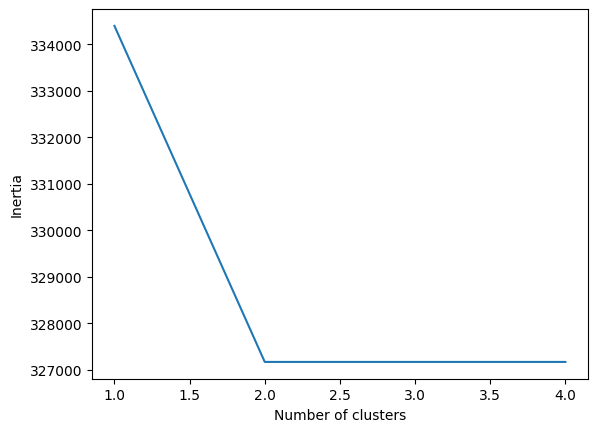

In [31]:
# Use the elbow method to find the optimal number of clusters

inertias = []
for k in range(1, 5):
    # Initialize cluster centroids randomly
    centroids = np.random.rand(k, 2)

    # Perform k-means clustering
    labels1 = np.zeros(len(pca_data))
    for i in range(100):
        # Assign each sample to the closest centroid
        for j, sample in enumerate(pca_data):
            labels1[j] = np.argmin([np.linalg.norm(sample - centroid) for centroid in centroids])

        # Update the centroids
        for j in range(k):
            centroids[j] = np.mean(pca_data[labels1 == j], axis=0)

    # Compute the sum of squared distances of the samples to the nearest cluster center
    inertia = 0
    for j, sample in enumerate(pca_data):
        inertia += np.linalg.norm(sample - centroids[int(labels1[j])]) ** 2
    inertias.append(inertia)

# Plot the inertia values for different k values
plt.plot(range(1, 5), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()